# Supervised Learning Project

### Instructions

- Analisis exploratorio del dataset, cuantos datos hay. Is your dataset balanced? What is the balance between classes?

- Multiples clases mutuamente excluyentes: usar 'one versus rest' classifier de entrenamiento

- Balanced accuracy score (ponderado por la distribucion de las clases en el dataset): 
    - from sklearn.metrics import balanced_accuracy_score 
    - score = balanced_accuracy_score(actual_values, predictions)
    - from sklearn.metrics import accuracy_score 
    - score = accuracy_score(actual_values, predictions)

- Accuracy

- Recall & Precision

- F-score

- Roc curve (comparativa) con su AUC

- Confusion matrix (norm & not normalized)

- KNN

- Voronoir Diagram

-----------------------
KNN (K Near Neighbours)

k = 3, los 3 puntos más cercanos a un punto.

para decidir la clasificación de un punto, se cogen los k = 3 más cercanos y se calcula la moda entre ellos, (si dos son negros y uno es blanco, la moda es negro)
el punto en cuestion sería negro. La k no puede ser gigante porque predecir sería muy costoso en tiempo. Se usan la distancia L1 y L2 (L2 es distancia Euclidea)
No funciona muy bien si  quieres implementarlo para un caso muy específico, si no tienes muchos ejemplos de ese caso específico, te lo va a predecir mal. Hay que tener un buen balance de datos
El recommender system es muy parecido a esto, hace algo así
    - from sklearn.neighbors import KNeighborsClassifier

# Diamonds

### This dataset contains the prices and other attributes of almost 54,000 diamonds.

### Content

- price: price in US dollars (326 -- 18,823 dollars)

- carat: weight of the diamond (0.2--5.01)

- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color: diamond colour, from J (worst) to D (best)

- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x: length in mm (0--10.74)

- y: width in mm (0--58.9)

- z: depth in mm (0--31.8)

- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table: width of top of diamond relative to widest point (43--95)

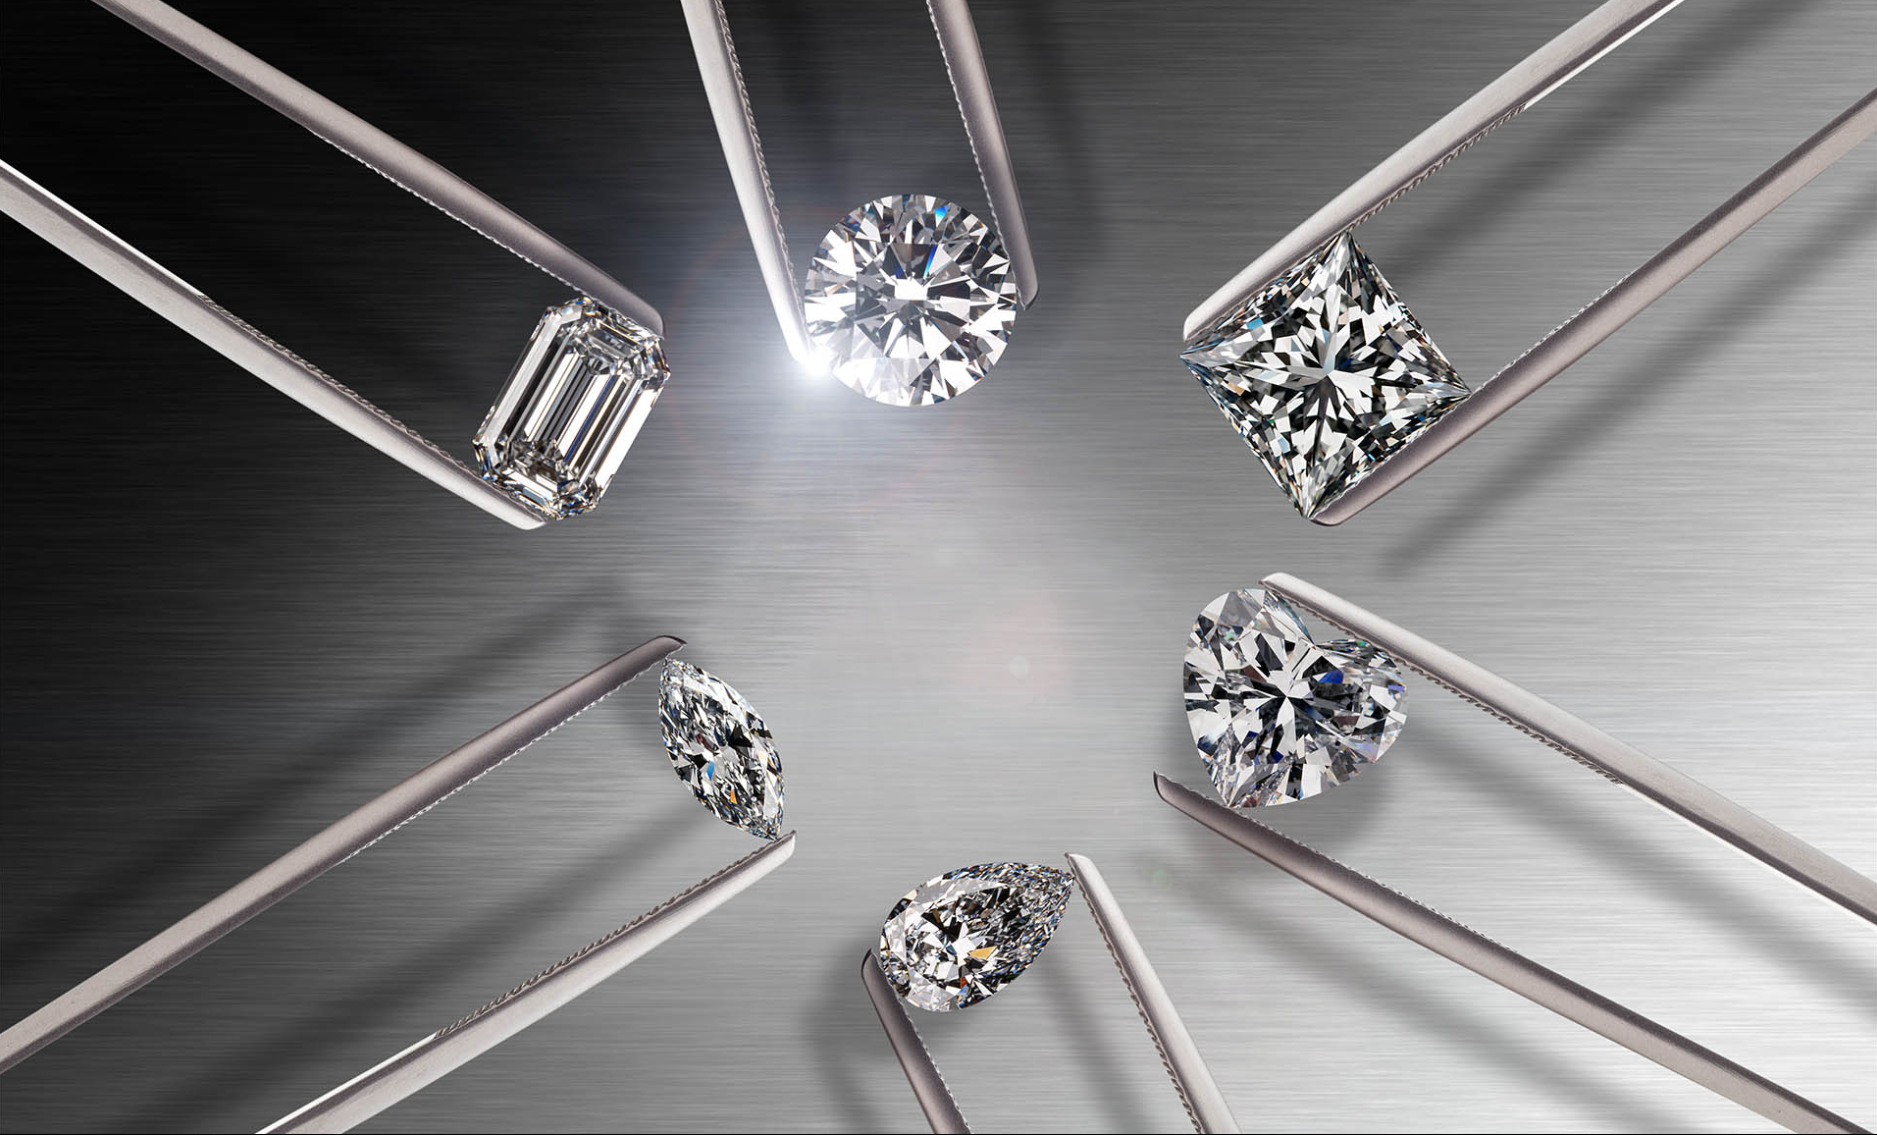

In [1]:
import pandas as pd
import numpy as np

In [2]:
diamonds = pd.read_csv('../diamonds.csv')

In [3]:
display(diamonds.head())
print(diamonds.shape)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


(53940, 11)


### Vamos a predecir el precio del diamante

In [4]:
diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Nos quitamos ya la columna Unnamed, que es un índice, porque no nos da información y además es un int y nos va a calcular su correlación, que no queremos.

In [6]:
diamonds.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
diamonds.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Sin embargo, vemos que la columna color está compuesta por letras.

Estas letras no representan colores en sí, si no una medida de pureza del color del diamante.

La D, E, F significa Exceptional White o Colorless, que es la mejor calidad, siendo la D la mejor.
La G, H, I, J represantan Rare White, que son un poco peores de calidad, siendo la G la mejor.

#### Vamos a crear un ranking de calidad del diamante según su color para poder ver si tiene correlación con el precio.

In [8]:
pureza_color = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}

diamonds.color.replace(to_replace = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}, inplace = True)

diamonds.dtypes

carat      float64
cut         object
color        int64
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [9]:
corr = diamonds.corr()
corr

,carat,color,depth,table,price,x,y,z
carat,1.000000,0.291437,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
color,0.291437,1.000000,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
depth,0.028224,0.047279,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.026465,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.172511,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.270287,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.263584,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.268227,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


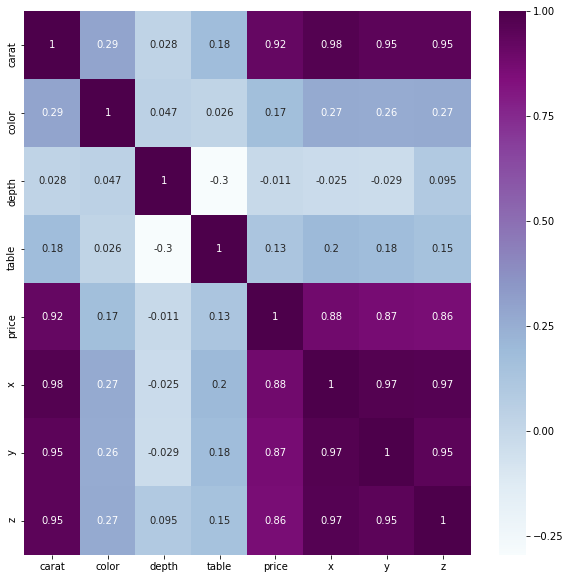

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr, annot=True, cmap="BuPu")

- Podemos observar una correlación positiva: todas las medidas (x, y, z) están correlacionadas entre ellas, junto al carat (peso). 
- El precio también está muy en relación a las medidas y el peso del diamante.
    - De hecho, la variable que más influye en el precio es el carat (peso), con un 92% de correlación positiva, cuando una sube la otra también.
    - La segunda variable que determina el precio es el largo del diamante (x), un poquito más que el ancho (y) y la profundidad (z).
- El color parece que no influye del todo en el precio.
- No vamos a borrar columnas due to high collinearity, porque todas las variables son determinantes


### Multiclass

Vamos a predecir el precio del diamante. 

- Los precios del dataset rondan entre los 326 y 18.823 dólares.
- El precio medio es de 3.932 dólares, y cada precio varía mucho respecto a la media.
- Hay una distribución logarítmica? vemos en los percentiles que hay una distribución decreciente a más precio.

In [11]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Confirmamos la distribución logarítmica, la mayoría de diamantes se concentran en precios pequeños.

In [12]:
diamonds.price.value_counts(bins = 9)

(307.502, 2381.222]       26778
(2381.222, 4436.444]       9912
(4436.444, 6491.667]       6901
(6491.667, 8546.889]       3418
(8546.889, 10602.111]      2278
(10602.111, 12657.333]     1651
(12657.333, 14712.556]     1222
(14712.556, 16767.778]      962
(16767.778, 18823.0]        818
Name: price, dtype: int64

In [13]:
for x in range(0, diamonds.price.max(), 2000): 
    z = diamonds.price[(2000 + x > diamonds.price) & (diamonds.price > x)].shape[0]
    print('Del precio ${} a ${} hay -->'.format(x, 2000 + x), z)

Del precio $0 a $2000 hay --> 24203
Del precio $2000 a $4000 hay --> 10353
Del precio $4000 a $6000 hay --> 7826
Del precio $6000 a $8000 hay --> 3945
Del precio $8000 a $10000 hay --> 2382
Del precio $10000 a $12000 hay --> 1758
Del precio $12000 a $14000 hay --> 1304
Del precio $14000 a $16000 hay --> 1017
Del precio $16000 a $18000 hay --> 830
Del precio $18000 a $20000 hay --> 312


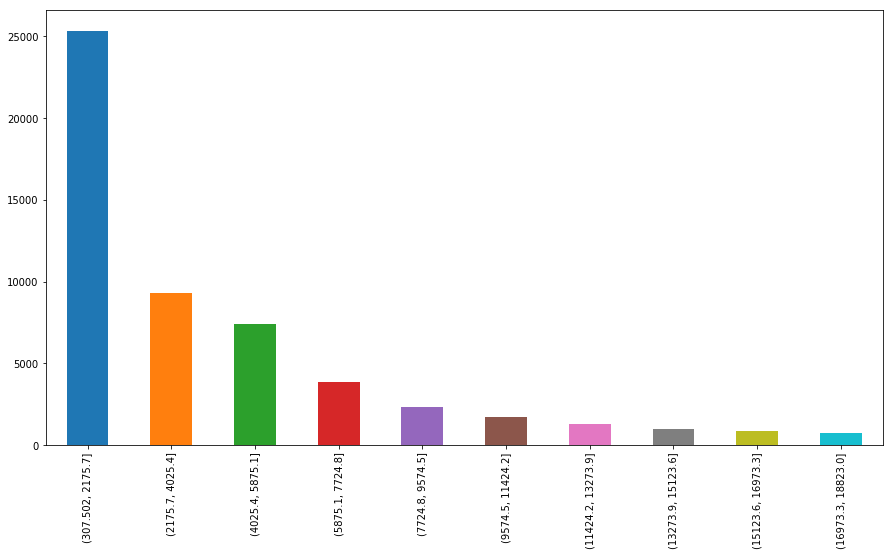

In [14]:
fig, ax = plt.subplots(figsize = (15,8))
ax = diamonds["price"].value_counts(bins = 10).plot.bar()
ax

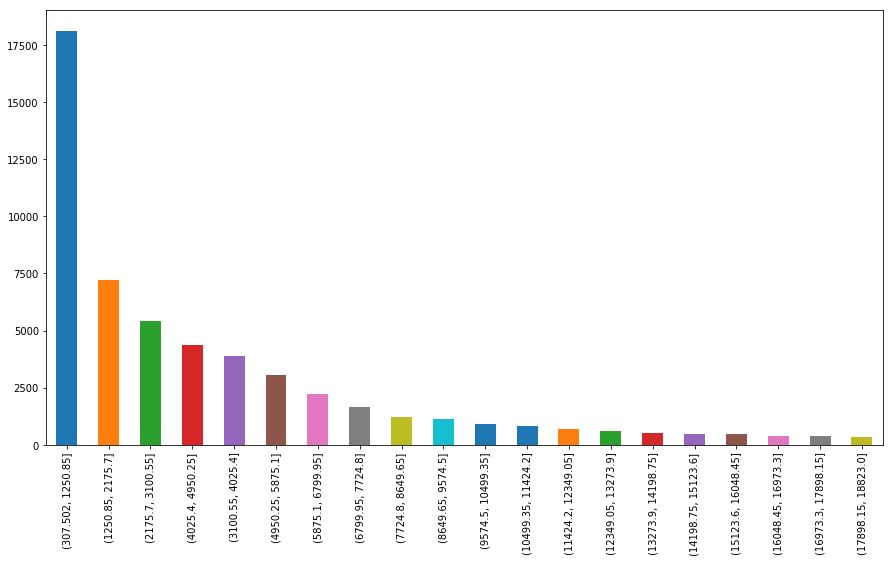

In [15]:
fig, ax = plt.subplots(figsize = (15,8))
ax = diamonds["price"].value_counts(bins = 20).plot.bar()
ax

Vamos a quedarnos con los precios como están aunque tenemos que tener en cuenta que nuestro dataset no tiene muchos ejemplos de diamantes muy caros (mayores de 10.000 dólares) y es probable que le cueste predecir diamantes muy caros y se equivoque. 

El dataset puede tener un 'bias' de diamantes baratos, y va a ser bueno reconociendo diamantes de 300 a 6.000 dólares.

### Creamos las bins del Multiclass

In [16]:
bins = [0, 1250, 2175, 3100, 4025, 4950, 5875, 6800, 7725, 8650, 9575, 10500, 11425, 12350, 13275, 14120, 15125, 16050, 17000, 17900, 18823]

diamonds['price_binned'] = pd.cut(diamonds['price'], bins = bins)
diamonds.drop(['price'], axis = 1, inplace = True)
display(diamonds.tail())

,carat,cut,color,clarity,depth,table,x,y,z,price_binned
53935,0.72,Ideal,1,SI1,60.8,57.0,5.75,5.76,3.50,"(2175, 3100]"
53936,0.72,Good,1,SI1,63.1,55.0,5.69,5.75,3.61,"(2175, 3100]"
53937,0.70,Very Good,1,SI1,62.8,60.0,5.66,5.68,3.56,"(2175, 3100]"
53938,0.86,Premium,5,SI2,61.0,58.0,6.15,6.12,3.74,"(2175, 3100]"
53939,0.75,Ideal,1,SI2,62.2,55.0,5.83,5.87,3.64,"(2175, 3100]"


Estas son nuestras 20 clases, rangos de precios:

In [17]:
diamonds.price_binned.value_counts()

(0, 1250]         18124
(1250, 2175]       7211
(2175, 3100]       5436
(4025, 4950]       4350
(3100, 4025]       3892
(4950, 5875]       3043
(5875, 6800]       2244
(6800, 7725]       1635
(7725, 8650]       1223
(8650, 9575]       1140
(9575, 10500]       908
(10500, 11425]      837
(11425, 12350]      682
(12350, 13275]      626
(14120, 15125]      516
(13275, 14120]      485
(15125, 16050]      460
(16050, 17000]      411
(17000, 17900]      372
(17900, 18823]      345
Name: price_binned, dtype: int64

## One Hot Encoding

Creamos las dummies de 'X' y de 'y'.

Nuestras variables categóricas eran 'cut' y 'clarity'. 
'price_binned' también se pasa a dummies en el y_test & y_train.

In [18]:
diamonds_dummy = pd.get_dummies(diamonds, drop_first=True)
diamonds_dummy.head()

,carat,color,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,"price_binned_(9575, 10500]","price_binned_(10500, 11425]","price_binned_(11425, 12350]","price_binned_(12350, 13275]","price_binned_(13275, 14120]","price_binned_(14120, 15125]","price_binned_(15125, 16050]","price_binned_(16050, 17000]","price_binned_(17000, 17900]","price_binned_(17900, 18823]"
0,0.23,2,61.5,55.0,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.21,2,59.8,61.0,3.89,3.84,2.31,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.23,2,56.9,65.0,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.29,6,62.4,58.0,4.20,4.23,2.63,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.31,7,63.3,58.0,4.34,4.35,2.75,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print(diamonds_dummy.shape)
print(diamonds_dummy.dtypes)

(53940, 37)
carat                          float64
color                            int64
depth                          float64
table                          float64
x                              float64
y                              float64
z                              float64
cut_Good                         uint8
cut_Ideal                        uint8
cut_Premium                      uint8
cut_Very Good                    uint8
clarity_IF                       uint8
clarity_SI1                      uint8
clarity_SI2                      uint8
clarity_VS1                      uint8
clarity_VS2                      uint8
clarity_VVS1                     uint8
clarity_VVS2                     uint8
price_binned_(1250, 2175]        uint8
price_binned_(2175, 3100]        uint8
price_binned_(3100, 4025]        uint8
price_binned_(4025, 4950]        uint8
price_binned_(4950, 5875]        uint8
price_binned_(5875, 6800]        uint8
price_binned_(6800, 7725]        uint8
price_binned_

# Modeling, Prediction, and Evaluation

In [20]:
X = diamonds_dummy[['carat', 'color', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = diamonds_dummy[['price_binned_(1250, 2175]', 'price_binned_(2175, 3100]', 'price_binned_(3100, 4025]', 'price_binned_(4025, 4950]', 'price_binned_(4950, 5875]', 'price_binned_(5875, 6800]', 'price_binned_(6800, 7725]', 'price_binned_(7725, 8650]', 'price_binned_(8650, 9575]', 'price_binned_(9575, 10500]', 'price_binned_(10500, 11425]', 'price_binned_(11425, 12350]', 'price_binned_(12350, 13275]', 'price_binned_(13275, 14120]', 'price_binned_(14120, 15125]', 'price_binned_(15125, 16050]', 'price_binned_(16050, 17000]', 'price_binned_(17000, 17900]', 'price_binned_(17900, 18823]']]

display(X.head(), X.shape, y.head(), y.shape)


,carat,color,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,2,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,1,0,0,0,0
1,0.21,2,59.8,61.0,3.89,3.84,2.31,0,0,1,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,4.05,4.07,2.31,1,0,0,0,0,0,0,1,0,0,0
3,0.29,6,62.4,58.0,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0
4,0.31,7,63.3,58.0,4.34,4.35,2.75,1,0,0,0,0,0,1,0,0,0,0


(53940, 18)

,"price_binned_(1250, 2175]","price_binned_(2175, 3100]","price_binned_(3100, 4025]","price_binned_(4025, 4950]","price_binned_(4950, 5875]","price_binned_(5875, 6800]","price_binned_(6800, 7725]","price_binned_(7725, 8650]","price_binned_(8650, 9575]","price_binned_(9575, 10500]","price_binned_(10500, 11425]","price_binned_(11425, 12350]","price_binned_(12350, 13275]","price_binned_(13275, 14120]","price_binned_(14120, 15125]","price_binned_(15125, 16050]","price_binned_(16050, 17000]","price_binned_(17000, 17900]","price_binned_(17900, 18823]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(53940, 19)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # no se pone random_state para que sea randomly generated sin saltos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43152, 18) (10788, 18) (43152, 19) (10788, 19)


#### Como estamos en un caso de Multiclass, usar OneVsRestClassifier

### LogisticRegression (solver="lbfgs")

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cls1 = OneVsRestClassifier(LogisticRegression(solver="lbfgs"))
scores1 = cross_val_score(cls1, X, y, cv=5)
print(scores1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/lo

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

[0.10585836 0.0987208  0.47654802 0.84130515 0.1029848 ]
Accuracy: 0.33 (+/- 0.59)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### LogisticRegression con solver default (solver="liblinear")

In [23]:
cls2 = OneVsRestClassifier(LogisticRegression())
scores2 = cross_val_score(cls2, X, y, cv=5)
print(scores2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.10641453 0.10252132 0.48461253 0.8654987  0.10307749]
Accuracy: 0.33 (+/- 0.61)


### LogisticRegression (solver="newton-cg")

In [24]:
cls3 = OneVsRestClassifier(LogisticRegression(solver='newton-cg'))
scores3 = cross_val_score(cls3, X, y, cv=5)
print(scores3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 10 is present in all training exampl

[0.1071561  0.10641453 0.48498331 0.85965888 0.1028921 ]
Accuracy: 0.33 (+/- 0.60)


### SVC 

In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC

cls4 = OneVsRestClassifier(svm.SVC())
scores4 = cross_val_score(cls4, X, y, cv=5)
print(scores4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[0.2121802  0.126066   0.48507601 0.68548387 0.1028921 ]
Accuracy: 0.32 (+/- 0.45)


### RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

cls5 = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores5 = cross_val_score(cls5, X, y, cv=5)
print(scores5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores5.mean(), scores5.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 10 is present in all training exampl

[0.2605673  0.1322766  0.48591027 0.82638116 0.64590286]
Accuracy: 0.47 (+/- 0.50)


### KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

cls6 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores6 = cross_val_score(cls6, X, y, cv=5)
print(scores6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores6.mean(), scores6.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 10 is present in all training exampl

[0.20754542 0.12421209 0.47793845 0.73887653 0.27632555]
Accuracy: 0.36 (+/- 0.44)


### LinearRegression with OnevsRestClassifier

In [28]:
from sklearn import linear_model

cls7 = OneVsRestClassifier(linear_model.LinearRegression())
scores7 = cross_val_score(cls7, X, y, cv=5)
print(scores7)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores7.mean(), scores7.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 5 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 10 is present in all training exampl

[0.10567297 0.09733037 0.48609566 0.88793103 0.1028921 ]
Accuracy: 0.34 (+/- 0.63)


## Test & Train con Random Forest Classifier & KNN

Los modelos que mejor accuracy nos han dado son RandomForest & KNN. Vamos a entrenar con ellos.

In [30]:
# Random Forest Classifier

cls5.fit(X_train, y_train)
cls5.score(X_test, y_test)

0.6635150166852057

In [50]:
# Random Forest Classifier fit with .predict(X_test)

cls5.fit(X_train, y_train).predict(X_test)
cls5.score(X_test, y_test)

0.6675936225435669

In [31]:
# K-Near Neighbors

cls6.fit(X_train, y_train)
cls6.score(X_test, y_test)

0.6017797552836485

In [51]:
# K-Near Neighbors fit with .predict(X_test)

cls6.fit(X_train, y_train).predict(X_test)
cls6.score(X_test, y_test)

0.6017797552836485

In [32]:
# SVC (por si acaso)

cls4.fit(X_train, y_train)
cls4.score(X_test, y_test)

# nada, en este caso no es bueno el SVC

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.43863552094920283

In [33]:
# LinearRegression (por si acaso)

cls7.fit(X_train, y_train)
cls7.score(X_test, y_test)

# nada, un score bajísimo

0.32879124953652206

# Random Forest Classifier

### y_pred Accuracy

In [44]:
# Prediction accuracy Random Forest Classifier

from sklearn import metrics

y_pred5 = cls5.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.6638857990359659


### Precision vs Recall & F-score

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
actual_values = y_test.values.argmax(axis=1)
predictions = cls5.predict(X_test).argmax(axis=1)
predictions

array([0, 3, 0, ..., 0, 2, 3])

In [60]:
precision = pd.DataFrame(precision_score(actual_values, predictions, average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions, average=None))
f_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

In [63]:
precision_recall = pd.concat([precision, recall, f_score], axis=1)
precision_recall.columns = ['Precision', 'Recall', 'F score']
precision_recall.index = ['price_binned_(1250, 2175]', 'price_binned_(2175, 3100]', 'price_binned_(3100, 4025]', 'price_binned_(4025, 4950]', 'price_binned_(4950, 5875]', 'price_binned_(5875, 6800]', 'price_binned_(6800, 7725]', 'price_binned_(7725, 8650]', 'price_binned_(8650, 9575]', 'price_binned_(9575, 10500]', 'price_binned_(10500, 11425]', 'price_binned_(11425, 12350]', 'price_binned_(12350, 13275]', 'price_binned_(13275, 14120]', 'price_binned_(14120, 15125]', 'price_binned_(15125, 16050]', 'price_binned_(16050, 17000]', 'price_binned_(17000, 17900]', 'price_binned_(17900, 18823]']
precision_recall.index.name = 'Price Ranges'
precision_recall

,Precision,Recall,F score
Price Ranges,,,
"price_binned_(1250, 2175]",0.675922,0.984341,0.801485
"price_binned_(2175, 3100]",0.825223,0.775187,0.799423
"price_binned_(3100, 4025]",0.779751,0.525120,0.627591
"price_binned_(4025, 4950]",0.706595,0.620567,0.660793
"price_binned_(4950, 5875]",0.644928,0.448739,0.529237
"price_binned_(5875, 6800]",0.633205,0.367713,0.465248
"price_binned_(6800, 7725]",0.651852,0.271605,0.383442
"price_binned_(7725, 8650]",0.579710,0.161943,0.253165
"price_binned_(8650, 9575]",0.514706,0.148305,0.230263


In [73]:
from sklearn.metrics import accuracy_score

# NO PONDERADO
# Ratio correct vs incorrect predictions

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.6919725621060437

In [74]:
from sklearn.metrics import balanced_accuracy_score

# PONDERADO ---> Más real
# Ratio correct vs incorrect predictions

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.2754989217466108

### Confusion Matrix

Confusion matrix, without normalization
[[4966   78    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [ 176  831   63    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [ 180   97  439  118    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [ 176    1   56  525   84    4    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [ 184    0    4   96  267   41    3    0    0    0    0    0    0    0
     0    0    0    0    0]
 [ 196    0    0    2   56  164   23    3    2    0    0    0    0    0
     0    0    0    0    0]
 [ 175    0    0    0    4   48   88    7    2    0    0    0    0    0
     0    0    0    0    0]
 [ 172    0    0    0    1    2   18   40   10    2    2    0    0    0
     0    0    0    0    0]
 [ 173    0    0    0    0    0    2   17   35    4    3    2    0    0
     0    0    0    0    0]
 [ 130    0    0    0    0    0    1    1   18   21    5    

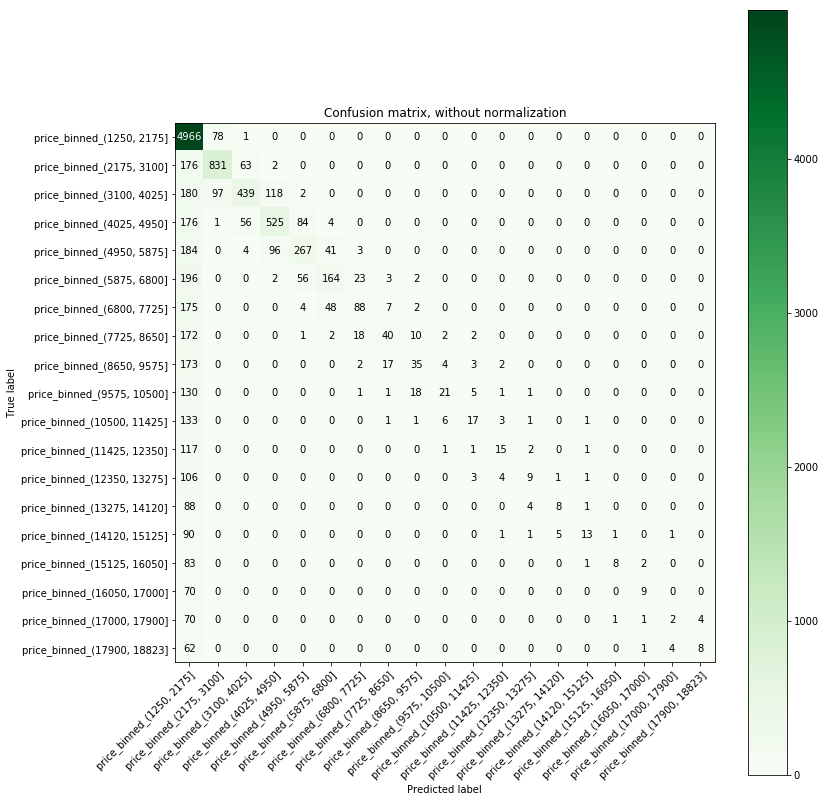

In [70]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

Según la Confusion Matrix, el modelo predice cada vez peor los diamantes más caros.
También vemos que el modelo confunde y suele catalogar más el precio de un diamante como un price range de 1.250 a 2.175 dólares.

### Roc Curve

### y_pred - KNN

In [47]:
y_pred6 = cls6.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.6017797552836485


In [42]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp